### 統計學習與深度學習 HW2
### 會計四 B06702064 林聖硯

#### 第一題 [Data Preprocessing]

In [267]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

資料網址 : https://drive.google.com/drive/folders/1SzmDs4FK_V4jPf8WLuz-j26oW0UcHghH?usp=sharing

In [268]:
x_train = pd.read_csv('adult_data.csv', header = None)
#test的資料的第一行跟數據無關，我直接將檔名改成csv檔並且移除
x_test = pd.read_csv('adult_test.csv', header = None)
x_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'ylabel']
x_train.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'ylabel']

In [269]:
def remove_white_space(df):
    for colname in df.columns:
        df[colname] = df[colname].apply(lambda x : x.strip() if type(x) == str else x)
    return df
        
def one_hot_on_y(df):
    #最後一欄為標籤，將'>50K'與'<=50K'轉成1跟0
    if df.shape[0] > 20000:
        trans_dict = {'<=50K':0, '>50K':1}
        df['ylabel'] = df['ylabel'].apply(lambda x : trans_dict[x])

    else:
        trans_dict = {'<=50K.':0, '>50K.':1}
        df['ylabel'] = df['ylabel'].apply(lambda x : trans_dict[x])
    return df 
    
def remove_nan(df):
    #把所有含有缺值的Rows刪除
    for colname in df.columns:
        df = df[df[colname] != '?']
    return df

def clean_df(df):
    df = remove_white_space(df)
    df = one_hot_on_y(df)
    df = remove_nan(df)
    return df

def normalize(df, df_used):
    conti_var = ['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num', 'age', 'fnlwgt']
    for var in conti_var:
        mean = df_used[var].mean()
        std = np.sqrt(np.var(df_used[var], ddof = 0))
        df[var] = df[var].apply(lambda x : (x-mean)/std)
    return df
        
def get_dummy(df):
    df = pd.get_dummies(df)
    if df.shape[0] > 20000:
    #只考慮在訓練資料中出現超過(含)10次的特徵值
        conti_var = ['capital-loss', 'hours-per-week', 'capital-gain', 'educational-num', 'age', 'fnlwgt']
        dummy_var = [var for var in df.columns if var not in conti_var]
        for var in dummy_var:
            summation = df[var].sum()
            if summation < 10:
                del df[var]
    return df
            
def get_y(df):
    y = df['ylabel']
    del df['ylabel']
    return y
        
def reset_df(df):
    ans_list = ['capital-loss', 'hours-per-week', 'capital-gain',
       'educational-num', 'age', 'fnlwgt', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried',
       'relationship_Wife', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
       'race_White', 'gender_Female', 'gender_Male',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'native-country_Cambodia',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Germany',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Haiti', 'native-country_Honduras',
       'native-country_Hong', 'native-country_Hungary',
       'native-country_India', 'native-country_Iran',
       'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan',
       'native-country_Laos', 'native-country_Mexico',
       'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed']
    
    df = df[ans_list]
    return df

In [270]:
x_train = clean_df(x_train)
x_test = clean_df(x_test)

x_train_copy = x_train.copy()

x_train = normalize(x_train, x_train_copy)
x_test = normalize(x_test, x_train_copy)

x_train = get_dummy(x_train)
x_test = get_dummy(x_test)

y_train = get_y(x_train)
y_test = get_y(x_test)

x_train = reset_df(x_train)
x_test = reset_df(x_test)

C:\Users\martin\.conda\envs\test\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [271]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [272]:
adult50k = {'x_train': x_train, 'x_test' : x_test, 'y_train' : y_train, 'y_test' : y_test}

In [ ]:
import pickle
dsfile = 'adult_m50k (1).pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

In [273]:
elems = ['x_train', 'x_test', 'y_train', 'y_test']

for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != adult50k[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

x_train match!
x_test match!
y_train match!
y_test match!


#### 第二題 [ROC and AUC]

In [18]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
#train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C = c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
#make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
#compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)    

Accuracy = 0.848406


In [19]:
thresholds = np.linspace(0, 1, 1000)
TPR_result = []
FPR_result = []
for threshold in thresholds:
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(ypredprob.shape[0]):
        prob_class_0 = ypredprob[i][0]     
        if prob_class_0 >= threshold and adult50kp['y_test'][i] == 0:
            TP += 1 
        if prob_class_0 < threshold and adult50kp['y_test'][i] == 0:
            FN += 1 
        if prob_class_0 >= threshold and adult50kp['y_test'][i] == 1:
            FP += 1
        if prob_class_0 < threshold and adult50kp['y_test'][i] == 1:
            TN += 1
    TPR = TP / (TP+FN)
    FPR = FP / (FP+TN)
    TPR_result.append(TPR)
    FPR_result.append(FPR)

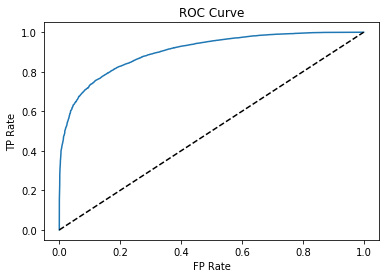

In [27]:
plt.plot(FPR_result, TPR_result)
plt.plot([0, 1], [0, 1], color = 'black', linestyle='dashed')
plt.title("ROC Curve") 
plt.ylabel("TP Rate") 
plt.xlabel("FP Rate")
plt.show()

In [21]:
AUC = 0
for i in range(1, len(TPR_result)):
    area = (1/2) * (TPR_result[i] + TPR_result[i-1]) * (FPR_result[i] - FPR_result[i-1])
    AUC += area

print("Area under curve is", -AUC)

Area under curve is 0.9034958127141229


#### 第三題 [Logistic Regression with L2 Regularization]

##### Q3.1:

Notations:

data matrix : $\displaystyle \mathbf{X}_{N \times (M+1)}$

data vector : $\displaystyle \mathbf{x}_{i \text{ }(M+1) \times 1}$

regression coefficient vector : $\displaystyle \mathbf{w}_{(M+1) \times 1}$

regularization coefficient matrix $\displaystyle \mathbf{\Lambda}_{(M+1) \times (M+1)} \text{  ,where  } \mathbf{\Lambda}_{kk} = \lambda_k$

Error function : $E(w) = \frac{1}{2} w^T \Lambda w - \sum_{i=1}^n [ t_i \ln y_i  + (1 - t_i) \ln (1 - y_i)],$

Let
$\displaystyle \sigma(x) = \frac{1}{1+e^{-x}}, \text{  } \displaystyle z_1 = t_i \ln [\sigma(\mathbf{w}^T \mathbf{x}_i)], \text{  } \displaystyle z_2 = (1-t_i) \ln [1- \sigma(\mathbf{w}^T \mathbf{x}_i)]$

$\displaystyle \frac{\partial z_1}{\partial \mathbf{w}} = \frac{t_i \sigma(\mathbf{w}^T \mathbf{x}_i) (1-\sigma(\mathbf{w}^T \mathbf{x}_i))\mathbf{x}_i}{\sigma(\mathbf{w}^T \mathbf{x}_i)} = t_i (1 - \sigma(\mathbf{w}^T \mathbf{x}_i)) \mathbf{x}_i$

$\displaystyle \frac{\partial z_2}{\partial \mathbf{w}} = \frac{(t_i - 1)\sigma(\mathbf{w}^T \mathbf{x}_i)(1-\sigma(\mathbf{w}^T \mathbf{x}_i))\mathbf{x}_i}{1- \sigma(\mathbf{w}^T \mathbf{x}_i)} = (t_i - 1)\sigma(\mathbf{w}^T \mathbf{x}_i) \mathbf{x}_i$

$\displaystyle \frac{\partial z_1}{\partial \mathbf{w}} + \frac{\partial z_2}{\partial \mathbf{w}} = (t_i - \sigma(\mathbf{w}^T \mathbf{x}_i))\mathbf{x}_i$

$\displaystyle \frac{\partial \frac{1}{2} \mathbf{w}^T \Lambda \mathbf{w}}{\partial \mathbf{w}} = \frac{1}{2} (\Lambda + \Lambda^T) \mathbf{w} = \Lambda \mathbf{w}$

$\displaystyle \Rightarrow \nabla E(\mathbf{w}) = \Lambda \mathbf{w} - \sum_{i = 1}^{N} [(t_i - \sigma (w^T \mathbf{x}_i)] = \Lambda \mathbf{w} + \sum_{i = 1}^{N} [\sigma (\mathbf{w}^T \mathbf{x}_i) - t_i] \mathbf{x}_i = \mathbf{X}^T (\mathbf{y} - \mathbf{t}) + \Lambda \mathbf{w}$

where $\displaystyle \mathbf{y} = \begin{bmatrix} \sigma(\mathbf{w}^T x_1) \\ \vdots
\\ \sigma(\mathbf{w}^T x_N) \end{bmatrix}, \mathbf{t} = \begin{bmatrix} 
t_1
\\ \vdots
\\ t_N \end{bmatrix}$

$\displaystyle \frac{\partial \sigma(  \mathbf{w}^T \mathbf{x}_i)}{\partial \mathbf{w}} = \sigma(\mathbf{w}^T \mathbf{x}_i) [1-\sigma(\mathbf{w}^T \mathbf{x}_i)] \mathbf{x}_i$

$\displaystyle \Rightarrow \mathbf{H} = \Lambda \mathbf{I} + \sum_{i = 1}^{N} [\sigma(\mathbf{w}^T \mathbf{x}_i) [1-\sigma(\mathbf{w}^T \mathbf{x}_i)] \mathbf{x}_i \mathbf{x}_i^{T}] = \mathbf{X}^T \mathbf{R} \mathbf{X} + \Lambda$

where $\mathbf{R}$ is a diagonal matrix with $\displaystyle \mathbf{R}_{nn} = \sigma(\mathbf{w}^T \mathbf{x}_i) [1-\sigma(\mathbf{w}^T \mathbf{x}_i)]$

##### Q3.2

In [1]:
import numpy as np
import pickle

In [11]:
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter = 1000, tol = 1e-5, add_intercept = True):
        """
        reg_vec: the regularization coefficient vector
        reg_vec is a list that contains three different coefficients
        [coef for conti variable, coef for binary variable, coef for constant term]
        max_iter: maximum number of iteration to run for the Newton method
        tol: tolerance for the objective function
        add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix
        """
        self.reg_vec = reg_vec
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept      
        self.weights = None
        
    def sigmoid(self, array):
        result = 1 / (1 + np.exp(-array)) 
        return result
    
    def train_weight(self, x, y_pred, y, Lambda, w):
        #gradient
        nabla_E = np.dot(x.T, (y_pred - y)) + np.dot(Lambda, w)

        #N*N matrix, diagonal elements = y_predicted
        R = np.diag(y_pred * (1 - y_pred))
        #hessian matrix
        H = Lambda + np.dot(np.dot(x.T, R), x)

        #update weights
        w = w - np.dot(np.linalg.inv(H), nabla_E)
        return w
    
    def create_Lambda(self):
        #regularization coefficient matrix (M+1, M+1)
        #第0-5個feature是continuous varaible
        #第6-101個feature是binary variable
        #第102個feautre是1向量(for constant)
        conti_array = np.full(6, self.reg_vec[0])
        binary_array = np.full(96, self.reg_vec[1])
        const_array = np.full(1, self.reg_vec[2])
        final_array = np.concatenate((conti_array, binary_array, const_array), axis = None)
        Lambda = np.diag(final_array)
        return Lambda
    
    def fit(self, x, y, verbal = False):
        
        if self.add_intercept == True:
            #(N, M+1)
            x = np.column_stack((x,np.ones((x.shape[0],1))))
        
        Lambda = self.create_Lambda()
        #b = the average of lambda_i
        b = np.sum(Lambda) / Lambda.shape[0]
        
        #initial vector by using colsed-form solution
        #w : (M+1, 1)
        w = np.dot(np.linalg.inv(np.dot(x.T, x) + b * np.eye(x.shape[1])), np.dot(x.T, y))
        
        step_sizes = 5000
        iteration = 0
        
        #algo
        while(step_sizes >= self.tol and iteration < self.max_iter):
            iteration += 1
            #old_weights = np.copy(w)
            y_pred = self.sigmoid(np.dot(x, w))
            old_loss = 1/2 * (np.dot(np.dot(w.T, Lambda), w)) - (np.dot(np.invert(y == 1), np.log(1-y_pred)) + np.dot(np.log(y_pred), y))

            w = self.train_weight(x, y_pred, y, Lambda, w)
            y_pred = self.sigmoid(np.dot(x, w))
            new_loss = 1/2 * (np.dot(np.dot(w.T, Lambda), w)) - (np.dot(np.invert(y == 1), np.log(1-y_pred)) + np.dot(np.log(y_pred), y))
            step_sizes = abs(new_loss - old_loss)
            
            if verbal == True:
                print("Iteration (start) : ",iteration)
                print("\nTraining loss\n", new_loss)
                print("\nStep sizes\n",step_sizes)
                print("\nNew Weights\n",w)
        
        self.weights = w
        
    def predict(self, x):
        """doing prediction"""
        x = np.column_stack((x,np.ones((x.shape[0],1))))
        y_pred = self.sigmoid(np.dot(x, self.weights))
        y_pred = 1 * (y_pred > 0.5)
        return y_pred

In [12]:
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

In [14]:
X_train = adult50kp['x_train']
Y_train = adult50kp['y_train']
X_test = adult50kp['x_test']
Y_test = adult50kp['y_test']

In [25]:
lambda_vec_1 = [1, 1, 1]
logic1 = mylogistic_l2(reg_vec = lambda_vec_1, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic1.fit(X_train, Y_train)
ypred_1 = logic1.predict(X_test)
acc_1 = np.sum(ypred_1 == Y_test) / len(ypred_1)
print("Accuracy of case 1 =", acc_1)
print("weights = ", logic1.weights)

Accuracy of case 1 = 0.847875166002656
weights =  [ 2.58310749e-01  3.52951378e-01  2.33390152e+00  7.51145211e-01
  3.33524430e-01  7.92368680e-02 -2.59305992e-01 -3.31059192e-02
 -8.02092312e-01 -1.16328375e+00 -1.57480268e-01  1.06974336e+00
 -6.33846058e-01  1.16732409e-01 -2.31567381e-01 -5.17122207e-01
 -7.97216465e-02 -1.09949780e+00 -2.46027086e-01  6.19694928e-02
  1.26685884e-01  8.62656059e-01 -9.18352843e-01 -6.21226177e-01
 -2.00740224e-01 -7.51600981e-01 -1.61011588e+00  5.75820911e-01
  6.48995283e-01  3.53741434e-01  7.17218474e-01 -2.84494743e-02
 -9.54820746e-04 -1.96540899e-01 -1.46351640e-01  6.26946275e-01
  4.48207080e-01  2.45945819e-02  4.69223657e-02 -4.91067746e-01
 -2.03035424e-01 -1.63303680e-01 -1.76623501e-02 -1.11328323e-01
 -9.94618240e-02 -1.17391916e+00  1.80702678e-01 -6.92720004e-02
  9.76496905e-01  4.60988601e-01 -4.95440416e-01 -1.27203531e+00
  4.86772406e-01 -8.98963733e-01 -6.00542591e-02 -3.50848853e-01
  4.32815220e-01  5.94120150e-01  5.8215

In [32]:
lambda_vec_2 = [1, 1, 0]
logic2 = mylogistic_l2(reg_vec = lambda_vec_2, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic2.fit(X_train, Y_train)
ypred_2 = logic2.predict(X_test)
acc_2 = np.sum(ypred_2 == Y_test) / len(ypred_2)
print("Accuracy of case 2 =", acc_2)
print("weights = ", logic2.weights)

Accuracy of case 2 = 0.8477423638778221
weights =  [ 0.25833063  0.35307341  2.33348255  0.7378757   0.33385106  0.07926886
 -0.04219572  0.1998764  -0.58360968 -0.93671312  0.07548468  1.28715744
 -0.37140327  0.39422898  0.04305748 -0.26147348  0.19559029 -0.42695771
  0.42695771  0.16424528  0.22840772  0.96472553 -0.81743779 -0.52074423
 -0.09910239 -0.64944042 -1.55235098  0.6786798   0.75066429  0.45541098
  0.81857112  0.07308911  0.0728464  -0.11752644 -0.06282948  0.67242506
  0.5040869   0.08799091  0.11435013 -0.38483984 -0.10196309 -0.05145374
  0.10741777 -0.01997934  0.01717544 -1.16567808  0.30082277  0.02715464
  1.00831207  0.50210397 -0.45756662 -1.24002555  0.52780939 -0.86832688
 -0.02771494 -0.31412701  0.47343435  0.62981111  0.62405658 -0.5867506
 -0.0296708   0.12414401 -0.14376238  0.02434194  0.0621604  -0.24843986
  0.19459429  0.52620501  0.93165615  0.18707696  0.37950109 -0.28749402
 -0.31137357 -0.33290534 -0.65117786 -0.38160106  0.48879121  0.17662205
 

In [33]:
lambda_vec_3 = [1, 0.5, 0]
logic3 = mylogistic_l2(reg_vec = lambda_vec_3, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic3.fit(X_train, Y_train)
ypred_3 = logic3.predict(X_test)
acc_3 = np.sum(ypred_3 == Y_test) / len(ypred_3)
print("Accuracy of case 3 =", acc_3)
print("weights = ", logic3.weights)

Accuracy of case 3 = 0.847675962815405
weights =  [ 0.25851661  0.3533387   2.33562764  0.7825921   0.33439916  0.07940036
 -0.08347988  0.23309134 -0.59278098 -0.9224849   0.11139573  1.25425869
 -0.38299462  0.41291781  0.04136013 -0.26411462  0.19283128 -0.42890321
  0.42890321  0.23635122  0.30021361  1.03810521 -0.75216086 -0.4534137
 -0.02691157 -0.5825269  -2.00075382  0.75127891  0.82696617  0.52830705
  0.89488994  0.14510375  0.18253094 -0.02583999  0.00991404  0.89862004
  0.68517002  0.23294385  0.24519931 -0.38363083 -0.08029608 -0.06493444
  0.0453608   0.03743376 -0.01295908 -2.09374319  0.25763304  0.06659781
  1.18748312  0.55059265 -0.47576613 -1.45842154  0.5822242  -1.0627833
 -0.00957211 -0.31704572  0.52485137  0.73044517  0.67457228 -0.63624179
 -0.00967268  0.17339113 -0.2364757   0.0375474   0.10120874 -0.24679341
  0.23800627  0.64228457  1.00567032  0.23258941  0.42267607 -0.35336167
 -0.29178766 -0.38125401 -0.96291964 -0.45007954  0.512985    0.22019382
  0

#### Q3.3

In [12]:
subtrain_ratio = 0.9
tuning_ratio = 0.1 
X_subtrain, X_tuning = np.split(X_train,[int(0.9 * X_train.shape[0])])
Y_subtrain, Y_tuning = np.split(Y_train,[int(0.9 * Y_train.shape[0])])

In [45]:
hyperparam_list = [0.01, 0.05, 0.1, 0.5, 1, 3, 5, 6, 7, 8, 10, 20, 50, 100]
acc_list = []
max_acc = 0
max_a = 0
for hyperparam in hyperparam_list:
    lambda_vec = [hyperparam, hyperparam, 0]
    logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic.fit(X_subtrain, Y_subtrain)
    ypred = logic.predict(X_tuning)
    acc = np.sum(ypred == Y_tuning) / len(ypred)
    acc_list.append(acc)

    if acc > max_acc:
        max_acc = acc
        max_a = hyperparam

In [56]:
print(hyperparam_list)
print(acc_list)
print("a_1 star and a_2 star = ", max_a)
print(max_acc)

[0.01, 0.05, 0.1, 0.5, 1, 3, 5, 6, 7, 8, 10, 50, 100]
[0.843221743453762, 0.843221743453762, 0.843221743453762, 0.8428902883659264, 0.8428902883659264, 0.8438846536294332, 0.8435531985415976, 0.8435531985415976, 0.8428902883659264, 0.8428902883659264, 0.8415644680145841, 0.8418959231024197, 0.8405701027510772]
a_1 star and a_2 star =  3
0.8438846536294332


In [49]:
#fixed a_1, find a_2
acc_list_2 = []
max_acc_2 = 0
max_a_2 = 0
a_1_star = 3
for hyperparam in hyperparam_list:
    lambda_vec = [a_1_star, hyperparam, 0]
    logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic.fit(X_subtrain, Y_subtrain)
    ypred = logic.predict(X_tuning)
    acc = np.sum(ypred == Y_tuning) / len(ypred)
    acc_list_2.append(acc)
    if acc > max_acc_2:
        max_acc_2 = acc
        max_a_2 = hyperparam

In [50]:
print(hyperparam_list)
print(acc_list_2)
print("a_2 star = ", max_a_2)
print(max_acc_2)

[0.01, 0.05, 0.1, 0.5, 1, 3, 5, 6, 7, 8, 10, 50, 100]
[0.843221743453762, 0.843221743453762, 0.843221743453762, 0.8428902883659264, 0.8428902883659264, 0.8438846536294332, 0.8435531985415976, 0.8428902883659264, 0.8425588332780908, 0.8435531985415976, 0.8425588332780908, 0.8402386476632416, 0.8402386476632416]
a_2 star =  3
0.8438846536294332


In [53]:
#fixed a_2, find a_1
max_acc_1 = 0
max_a_1 = 0
acc_list_1 = []
a_2_star = 3
for hyperparam in hyperparam_list:
    lambda_vec = [hyperparam, a_2_star, 0]
    logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logic.fit(X_subtrain, Y_subtrain)
    ypred = logic.predict(X_tuning)
    acc = np.sum(ypred == Y_tuning) / len(ypred)
    acc_list_1.append(acc)
    if acc > max_acc_1:
        max_acc_1 = acc
        max_a_1 = hyperparam

In [55]:
print(hyperparam_list)
print(acc_list_1)
print("a_1 star = ", max_a_1)
print(max_acc_1)

[0.01, 0.05, 0.1, 0.5, 1, 3, 5, 6, 7, 8, 10, 50, 100]
[0.8438846536294332, 0.8438846536294332, 0.8438846536294332, 0.8442161087172688, 0.8438846536294332, 0.8438846536294332, 0.8435531985415976, 0.8435531985415976, 0.8435531985415976, 0.8438846536294332, 0.8435531985415976, 0.8425588332780908, 0.8422273781902552]
a_1 star =  0.5
0.8442161087172688


In [58]:
lambda_vec = [max_a_1, max_a_2, 0]
logic = mylogistic_l2(reg_vec = lambda_vec, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic.fit(X_train, Y_train)
ypred = logic.predict(X_test)
acc = np.sum(ypred == Y_test) / len(ypred)
print("Accuracy of model with optimal hyperparameters =", acc)

Accuracy of model with optimal hyperparameters = 0.848339973439575


#### Q3.4

In [5]:
from sklearn.linear_model import LogisticRegression

In [20]:
#tuning hyperparameter
max_hyperparam = 0
max_acc = 0
hyperparam_list = [0.01, 0.05, 0.1, 0.3, 0.5, 1, 3, 5, 6, 7, 8, 10, 50, 100]
for hyperparam in hyperparam_list:
    clf = LogisticRegression(max_iter = 1000, C = hyperparam).fit(X_subtrain, Y_subtrain)
    ypred = clf.predict(X_tuning)
    acc = np.sum(ypred == Y_tuning) / len(ypred)
    print("C = ", hyperparam, ", tuning accuracy = ", acc)
    if acc > max_acc:
    max_acc = acc
    max_hyperparam = hyperparam

print("best hyperparam = ", max_hyperparam)

C =  0.01 , tuning accuracy =  0.8405701027510772
C =  0.05 , tuning accuracy =  0.8409015578389128
C =  0.1 , tuning accuracy =  0.8415644680145841
C =  0.3 , tuning accuracy =  0.8438846536294332
C =  0.5 , tuning accuracy =  0.8435531985415976
C =  1 , tuning accuracy =  0.8428902883659264
C =  3 , tuning accuracy =  0.843221743453762
C =  5 , tuning accuracy =  0.843221743453762
C =  6 , tuning accuracy =  0.843221743453762
C =  7 , tuning accuracy =  0.843221743453762
C =  8 , tuning accuracy =  0.843221743453762
C =  10 , tuning accuracy =  0.843221743453762
C =  50 , tuning accuracy =  0.843221743453762
C =  100 , tuning accuracy =  0.843221743453762
best hyperparam =  0.3


In [9]:
#final model
clf_final = LogisticRegression(max_iter = 1000, C = 0.3).fit(X_train, Y_train)
ypred = clf_final.predict(X_test)
acc = np.sum(ypred == Y_test) / len(ypred)
print("C = ", 0.3, ", testing accuracy = ", acc)
print("weights = ", np.append(clf_final.coef_[0], clf_final.intercept_[0]))

C =  0.3 , testing accuracy =  0.8484063745019921
weights =  [ 0.25717815  0.35206347  2.2957719   0.6949959   0.33276084  0.07885247
  0.05534442  0.11574809 -0.54345152 -0.95582312 -0.01762452  1.34809177
 -0.32812886  0.33197239  0.04393917 -0.24608439  0.2005868  -0.4160256
  0.41831071  0.0769559   0.14074843  0.87112262 -0.87406429 -0.58571522
 -0.18467969 -0.71712791 -0.85143654  0.58815058  0.64420534  0.36391851
  0.71363501 -0.01377867 -0.01320054 -0.18074103 -0.10522397  0.37865295
  0.30503309 -0.02937531  0.00349633 -0.35723238 -0.10135421 -0.01768056
  0.17348879 -0.05605807  0.06371553 -0.41730796  0.34678634  0.00928611
  0.60369953  0.37792185 -0.35993256 -0.77470476  0.38645292 -0.50726529
 -0.04074784 -0.25856586  0.34529122  0.39456984  0.49221836 -0.41676724
 -0.04247507  0.04379815 -0.05486178  0.01449856  0.01069122 -0.21499405
  0.10749424  0.28136522  0.71710014  0.09669757  0.27525339 -0.14772795
 -0.33021748 -0.21026652 -0.28397817 -0.22676303  0.43359944  0.

In [10]:
lambda_vec_final = [3.33, 3.33, 0]
logic_final = mylogistic_l2(reg_vec = lambda_vec_final, max_iter = 1000, tol = 1e-5, add_intercept = True)
logic_final.fit(X_train, Y_train)
ypred = logic_final.predict(X_test)
acc = np.sum(ypred == Y_test) / len(ypred)
print("mylogisticl2, lambda = 3.33")
print("Accuracy =", acc)
print("weights = ", logic_final.weights)

mylogisticl2, lambda = 3.33
Accuracy = 0.8484063745019921
weights =  [ 2.57160813e-01  3.52083121e-01  2.29568097e+00  6.94652378e-01
  3.32757736e-01  7.88271612e-02  5.53529760e-02  1.15569300e-01
 -5.44742135e-01 -9.56462573e-01 -1.77695628e-02  1.34805199e+00
 -3.29210432e-01  3.31185097e-01  4.36613178e-02 -2.45637700e-01
  2.00001717e-01 -4.17166844e-01  4.17166844e-01  7.66192555e-02
  1.40326268e-01  8.70720830e-01 -8.74565778e-01 -5.86059116e-01
 -1.85121375e-01 -7.17560627e-01 -8.53302536e-01  5.87738623e-01
  6.43544965e-01  3.63612391e-01  7.13249464e-01 -1.42610185e-02
 -1.40850612e-02 -1.81554260e-01 -1.05968552e-01  3.75650550e-01
  3.04309800e-01 -3.04178028e-02  2.54679900e-03 -3.57330508e-01
 -1.01661389e-01 -1.76358348e-02  1.74076184e-01 -5.65461314e-02
  6.37936444e-02 -4.11255119e-01  3.47149349e-01  8.92833095e-03
  6.03729629e-01  3.78060376e-01 -3.60119508e-01 -7.73824445e-01
  3.86802976e-01 -5.07860591e-01 -4.06484434e-02 -2.58266428e-01
  3.45630128e-01  3.9

從上述結果可以看出使用sklearn logistic regression model，最佳的參數為$\displaystyle C = 0.3 \Rightarrow \lambda = \frac{1}{0.3} = 3.33$。
與使用mylogisticl2並且設定$\lambda = 3.33$的結果類似，accuracy相同，但weights有些許差距，可能是因為mylogisticl2的Newton-Raphson method，而sklearn logistic regression使用的是Limited-memory BFGS method